# Introduction to Regression Using Neural Networks in TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.18.0


### Creating data to review and fit

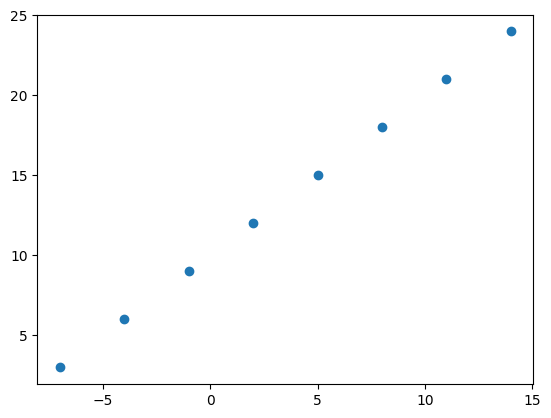

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0],dtype=np.float32)

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0],dtype=np.float32)

plt.scatter(X, y)
plt.show()

#### Input and output shapes - for regression, we only have **one** output

In [ ]:
# Create a demo tensor for the housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

## So we will predict $y$ based on one value of $X$.

#### Let's convert $X$ and $y$ into tensors

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with TensorFlow

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Create a model using the Sequential API
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))

In [ ]:
# Compile the model
model1.compile(loss=tf.keras.losses.mae,                   # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),        # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [ ]:
# Fit the model
model1.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8.3825 - mae: 8.3825
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 8.2500 - mae: 8.2500
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 8.1175 - mae: 8.1175
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 7.9850 - mae: 7.9850
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 7.8525 - mae: 7.8525


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction with the trained model

model1.predict(np.array([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[32.79311]], dtype=float32)

### Pretty lousy model performance... let's try increaseing the number of epochs from 5 to 100.

In [ ]:
# Fit the model
model1.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 7.7200 - mae: 7.7200
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 7.5875 - mae: 7.5875
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 7.4550 - mae: 7.4550
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 7.4400 - mae: 7.4400
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 7.4344 - mae: 7.4344
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 7.4288 - mae: 7.4288
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 7.4231 - mae: 7.4231
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 7.4175 - mae: 7.4175
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 7.4119 - mae: 7.4119
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 7.4063 - mae: 7.4063
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 7.4006 - mae: 7.4006
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 7.3950 - mae: 7.3950
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model1.predict(np.array([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[35.650608]], dtype=float32)

#### Let's add some hidden layers to the network to improve performance.

In [ ]:
# Create a model using the Sequential API
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(3, activation="relu"))
model2.add(tf.keras.layers.Dense(1))

# Compile the model
model2.compile(loss=tf.keras.losses.mae,                                      # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model2.fit(tf.expand_dims(X,axis=-1), y, epochs=100, verbose=False)


In [ ]:
model2.predict(np.array([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.9193411]], dtype=float32)

#### The model is probably overfitting the training data.

## Common ways to improve a DNN model:

* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* Change the learning rate  (this usually has the most impact)


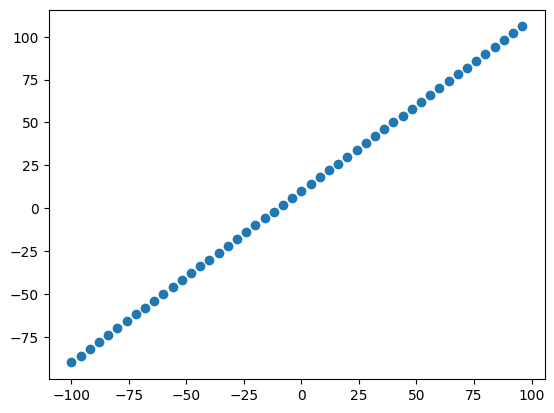

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10

plt.scatter(X, y)
plt.show()

#### Split $X$ into train and test datasets.

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([40]), TensorShape([10]), TensorShape([40]), TensorShape([10]))

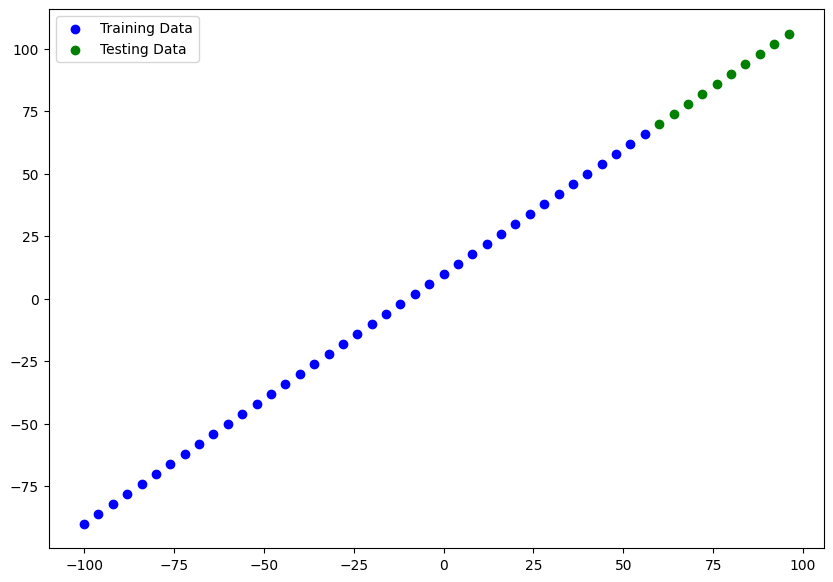

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.legend()
plt.show()

#### Fit a model on the training data and generate predictions with the test data.

In [ ]:
# Create a model using the Sequential API
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(3, activation="relu"))
model3.add(tf.keras.layers.Dense(1))

# Compile the model
model3.compile(loss=tf.keras.losses.mae,                                      # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=.05),
              metrics=["mae"])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
model3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=False)

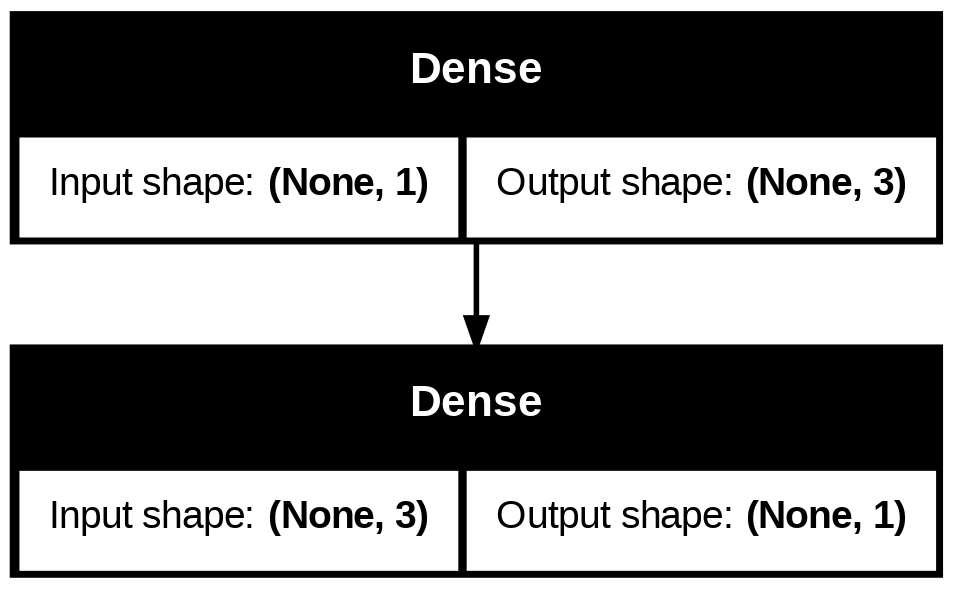

In [ ]:
plot_model(model3, show_shapes=True)

In [ ]:
preds = model3.predict(X_test)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


array([[ 71.86312 ],
       [ 75.99904 ],
       [ 80.134964],
       [ 84.2709  ],
       [ 88.40682 ],
       [ 92.54275 ],
       [ 96.67867 ],
       [100.81459 ],
       [104.950516],
       [109.08644 ]], dtype=float32)

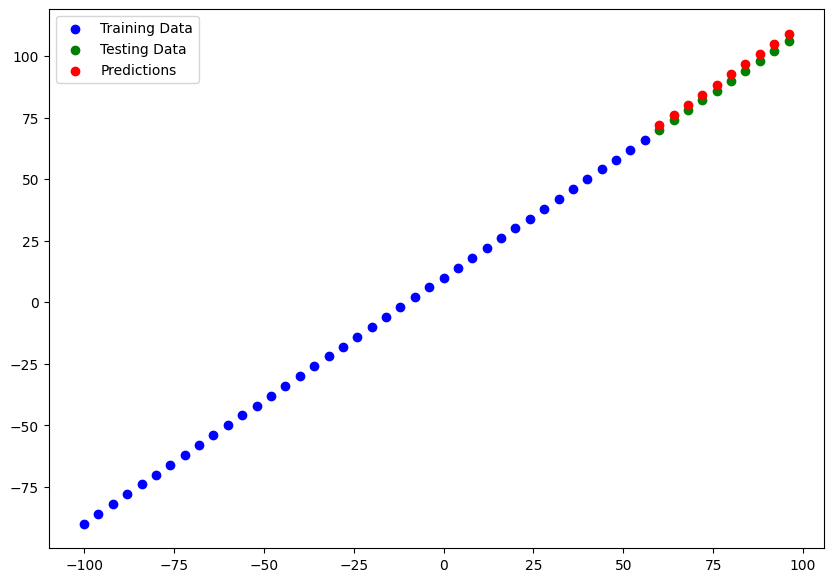

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.scatter(X_test, preds, c='r', label='Predictions')
plt.legend()
plt.show()

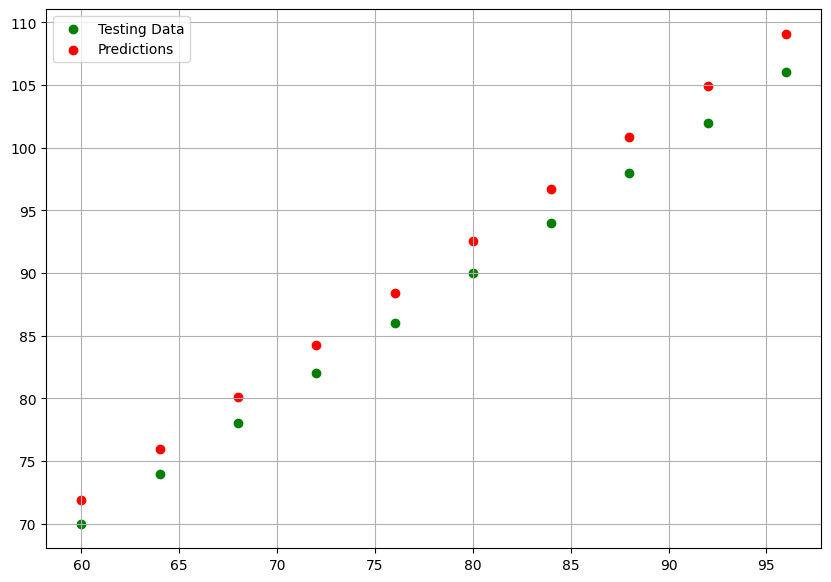

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test,y_test, c='g', label='Testing Data')
plt.scatter(X_test,preds, c='r', label='Predictions')
plt.grid(True)
plt.legend()
plt.show()

#### Model Evaluation Metrics

In [ ]:
model3.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - loss: 2.4748 - mae: 2.4748


[2.474781036376953, 2.474781036376953]

#### Mean Absolute Error

In [ ]:
y_test,preds

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 71.86312 ],
        [ 75.99904 ],
        [ 80.134964],
        [ 84.2709  ],
        [ 88.40682 ],
        [ 92.54275 ],
        [ 96.67867 ],
        [100.81459 ],
        [104.950516],
        [109.08644 ]], dtype=float32))

In [ ]:
# Need to convert preds to a tensor and reshape y_test

preds = tf.constant(preds)
y_test = tf.reshape(tf.cast(y_test,dtype=tf.float32), (preds.shape))
preds, y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 71.86312 ],
        [ 75.99904 ],
        [ 80.134964],
        [ 84.2709  ],
        [ 88.40682 ],
        [ 92.54275 ],
        [ 96.67867 ],
        [100.81459 ],
        [104.950516],
        [109.08644 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.],
        [ 74.],
        [ 78.],
        [ 82.],
        [ 86.],
        [ 90.],
        [ 94.],
        [ 98.],
        [102.],
        [106.]], dtype=float32)>)

In [ ]:
mae = tf.reduce_mean(tf.abs(y_test - preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.474781036376953>

In [ ]:
mae=MeanAbsoluteError()
mae.update_state(y_test,preds)
mae.result().numpy()

2.474781

#### Mean Squared Error

In [ ]:
mse=MeanSquaredError()
mse.update_state(y_test,preds)
mse.result().numpy()

6.2769647

#### Run experiments to improve model performance.

1. `model1` - same as original model, 1 layer, trained for 100 epochs.
2. `model2` - 2 layers trained for 100 epochs
3. `model3` - 2 layers trained for 500 epochs

In [ ]:
# model_1

tf.random.set_seed(42)

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

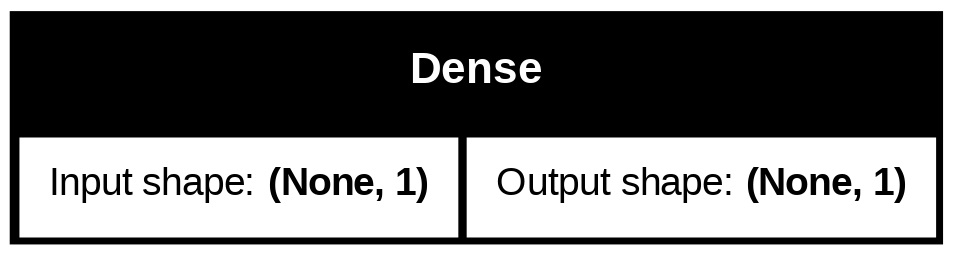

In [ ]:
plot_model(model1, show_shapes=True)

In [ ]:
model1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=False)

In [ ]:
model1.evaluate(tf.expand_dims(X_test,axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 13.6566 - mae: 13.6566


[13.656575202941895, 13.656575202941895]

In [ ]:
model1.predict(np.array([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[20.71365]], dtype=float32)

In [ ]:
preds = model1.predict(X_test)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[57.699703],
       [61.398308],
       [65.09691 ],
       [68.79552 ],
       [72.494125],
       [76.192726],
       [79.891335],
       [83.589935],
       [87.28854 ],
       [90.98715 ]], dtype=float32)

In [ ]:
def plot_model_results(X_train, y_train, X_test, y_test, preds):

  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, c='b', label='Training Data')
  plt.scatter(X_test, y_test, c='g', label='Testing Data')
  plt.scatter(X_test, preds, c='r', label='Predictions')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,7))
  plt.scatter(X_test,y_test, c='g', label='Testing Data')
  plt.scatter(X_test,preds, c='r', label='Predictions')
  plt.grid(True)
  plt.legend()
  plt.show()
  return

In [ ]:
def model_experiment(model, X_train, y_train, X_test, y_test, epochs=100):
    tf.random.set_seed(42)
    model.summary()
    plot_model(model, show_shapes=True)
    model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=epochs,verbose=False)
    print(model.evaluate(tf.expand_dims(X_test,axis=-1), y_test))
    preds = model.predict(X_test)
    preds = tf.constant(preds)
    y_test = tf.reshape(tf.cast(y_test,dtype=tf.float32), (preds.shape))
    plot_model_results(X_train, y_train, X_test, y_test, preds)
    mae = tf.reduce_mean(tf.abs(y_test - preds))
    mse = tf.reduce_mean(tf.square(y_test - preds))
    return mae, mse

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 12.3055 - mae: 12.3055
[12.305471420288086, 12.305471420288086]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


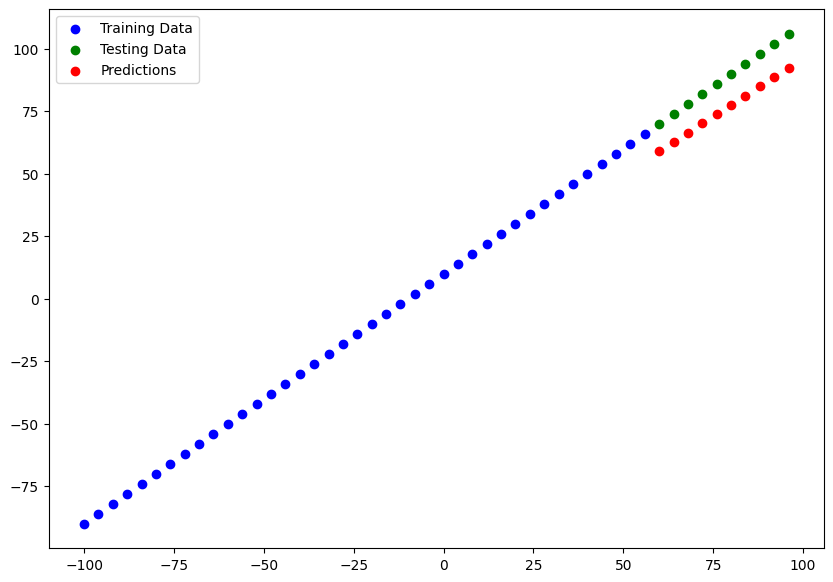

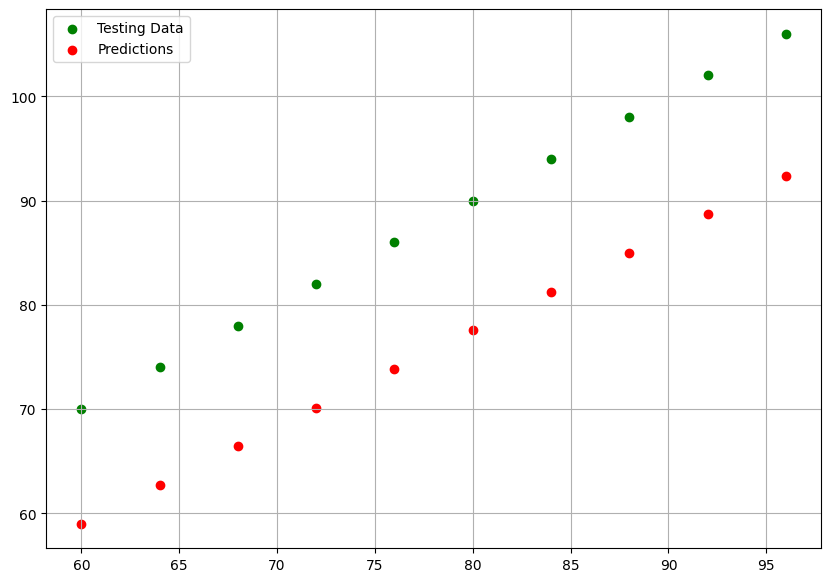

In [ ]:
mae1,mse1 = model_experiment(model1, X_train, y_train, X_test, y_test, epochs=100)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (132.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22 (92.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 85.5446 - mae: 85.5446


[85.54460144042969, 85.54460144042969]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


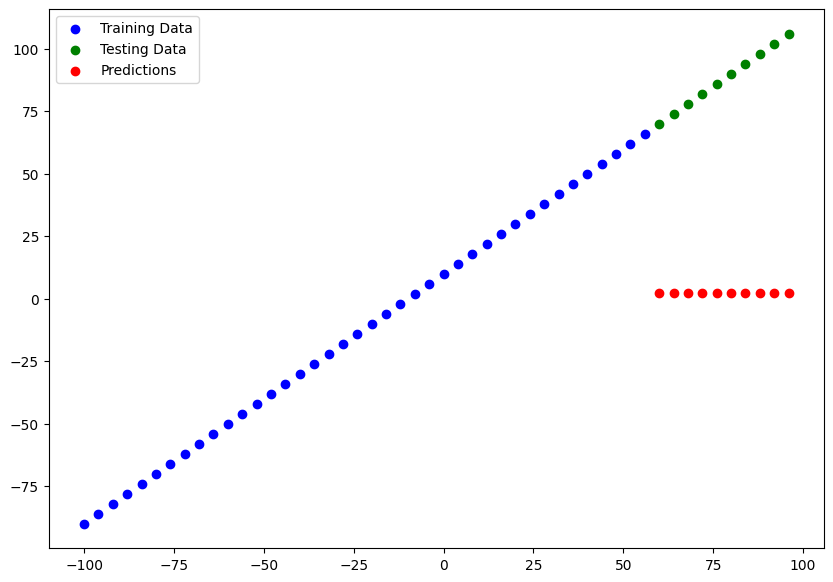

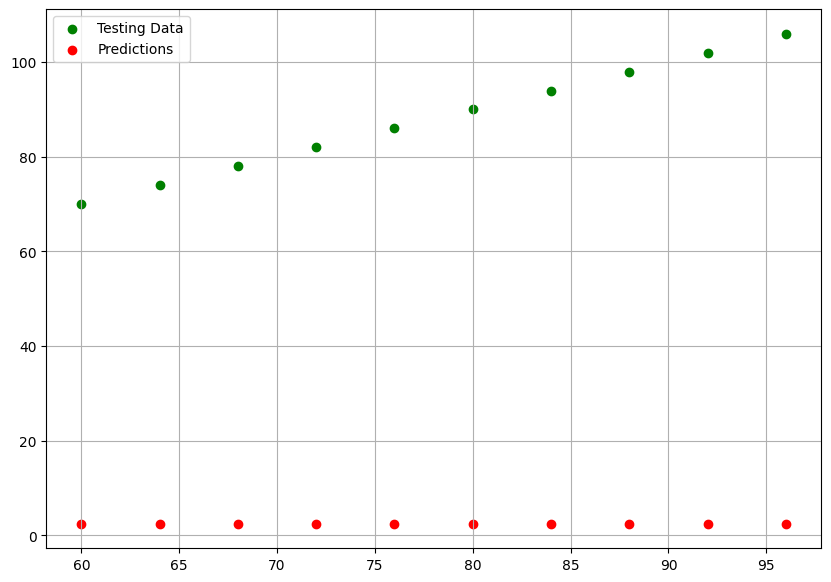

In [ ]:
# model2
mae2,mse2 = model_experiment(model2, X_train, y_train, X_test, y_test, epochs=100)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (132.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22 (92.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.3195 - mae: 0.3195
[0.3194694519042969, 0.3194694519042969]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


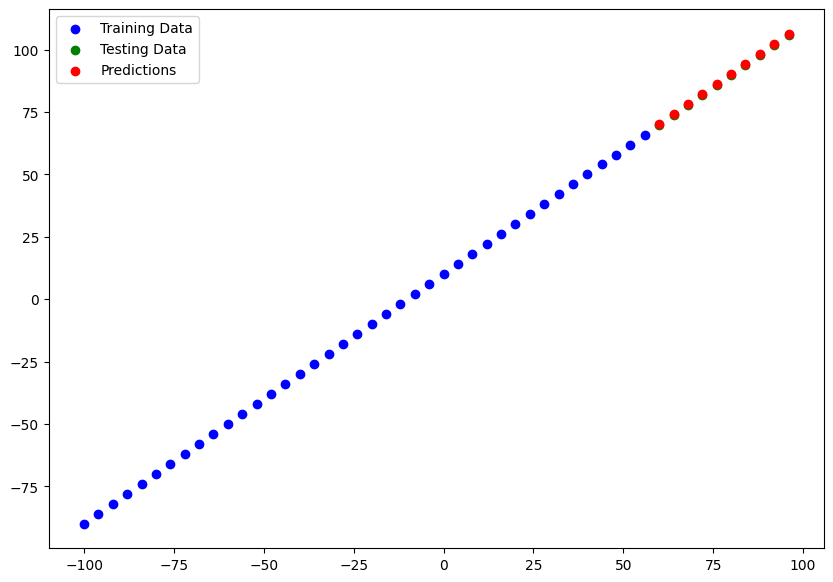

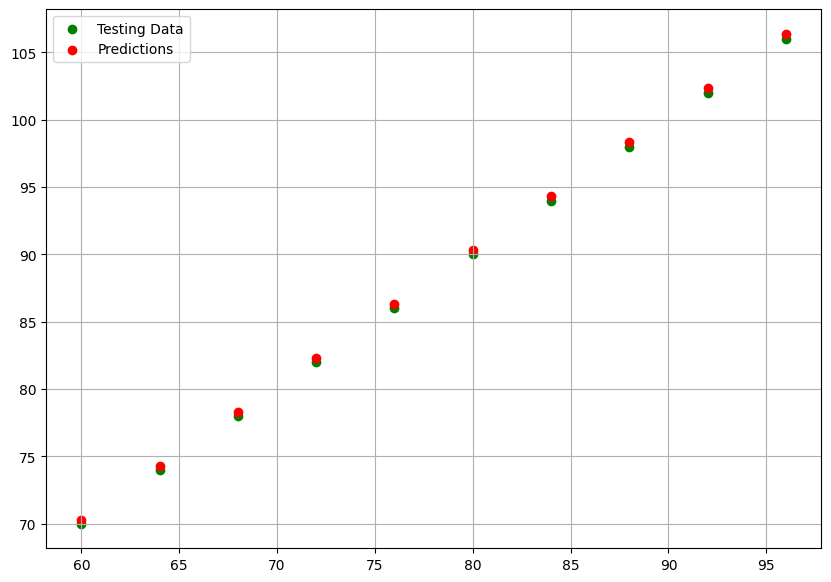

In [ ]:
mae3,mse3 = model_experiment(model3, X_train, y_train, X_test, y_test, epochs=500)

#### Summarize modeling experiment results...

In [ ]:
model_results = [["model1", mae1.numpy(), mse1.numpy()],
                 ["model2", mae2.numpy(), mse2.numpy()],
                 ["model3", mae3.numpy(), mse3.numpy()]]

df = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
df

,model,mae,mse
0,model1,12.305471,152.125168
1,model2,85.544601,7449.877930
2,model3,0.319469,0.103889


#### Save the best model, `model3`

In [ ]:
model3.save("model3_best_model.keras")

#### Load the model back into the environment.

In [ ]:
loaded_model = tf.keras.models.load_model("model3_best_model.keras")
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (132.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22 (92.00 B)

In [ ]:
preds3 = model3.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
preds3_loaded = loaded_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
preds3.shape, preds3_loaded.shape, preds3==preds3_loaded

((10, 1),
 (10, 1),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))